In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

plt.style.use('ggplot')

In [2]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

In [3]:
df = pd.read_csv('data/current_hospitals.csv')

In [6]:
df.set_index('state', inplace=True)

In [7]:
df.columns = pd.to_datetime(df.columns)

In [8]:
df1 = df.replace(0, np.NaN)

In [12]:
df1.fillna(0, inplace=True)

In [13]:
df1.to_csv('data/current_hospitals.csv')

In [8]:
df.set_index('state', inplace=True)

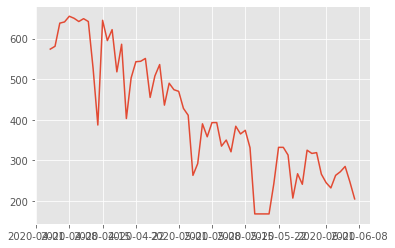

In [33]:
fig, ax = plt.subplots()
ax.plot(df1.columns.values, df1.loc['WA', :])

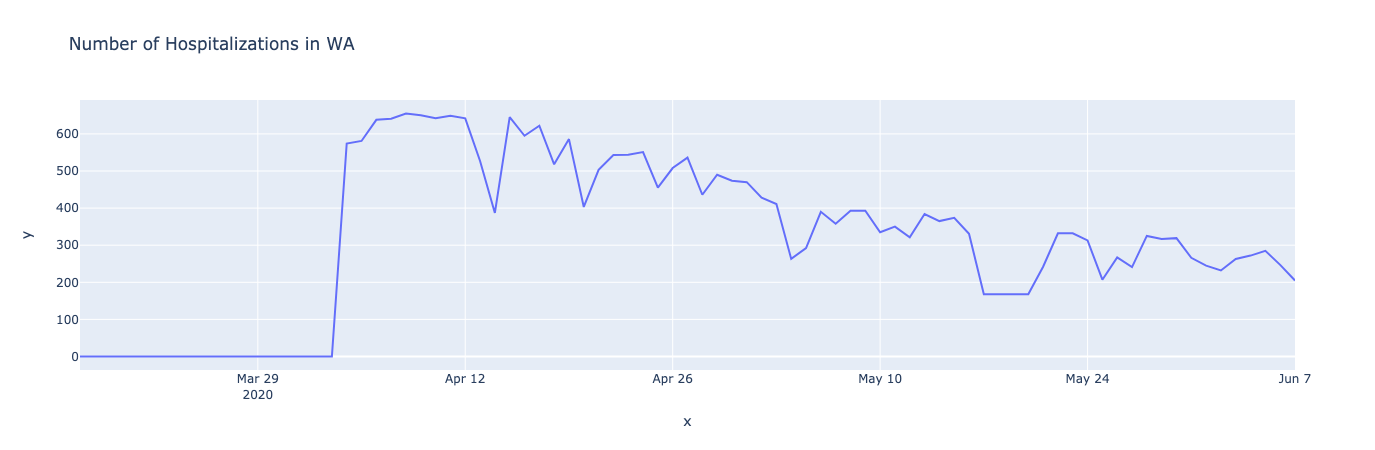

In [24]:
fig = px.line(df, x=df.columns.values, y=df.loc['WA', :], title='Number of Hospitalizations in {}'.format('WA'))
fig.update_layout(
    title="Plot Title",
    xaxis_title="x Axis Title",
    yaxis_title="y Axis Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
fig.show()

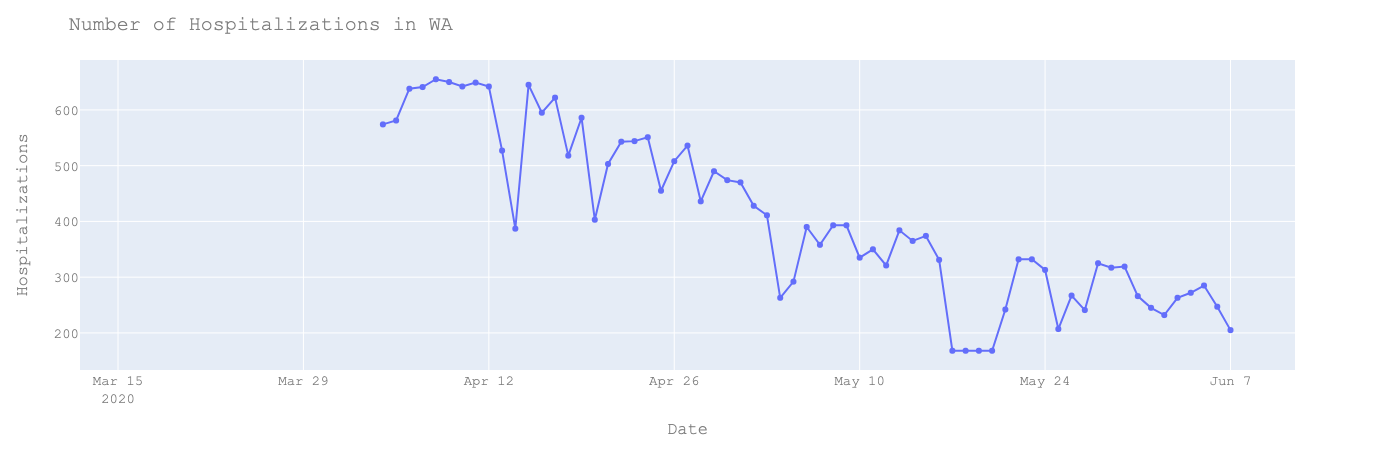

In [46]:
state = 'WA'
fig = px.line(df1, x=df1.columns.values, y=df1.loc[state, :])
fig.update_layout(
    title="Number of Hospitalizations in {}".format(state),
    xaxis_title="Date",
    yaxis_title="Hospitalizations",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    ))
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x")
fig.show()

In [45]:
df

,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,...,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07
state,,,,,,,,,,,,,,,,,,,,,
AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,14.0,14.0,10.0,10.0,11.0,13.0,8.0,7.0,7.0
AR,0.0,0.0,0.0,0.0,0.0,13.0,13.0,22.0,22.0,41.0,...,104.0,104.0,115.0,115.0,121.0,132.0,138.0,147.0,154.0,145.0
AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,931.0,975.0,973.0,968.0,1009.0,1092.0,1079.0,1234.0,1278.0,1252.0
CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4414.0,4215.0,4331.0,4258.0,4393.0,4458.0,4455.0,4625.0,4526.0,4525.0
CO,0.0,0.0,0.0,0.0,0.0,56.0,74.0,116.0,152.0,230.0,...,464.0,421.0,414.0,414.0,394.0,388.0,356.0,319.0,299.0,299.0
CT,0.0,0.0,0.0,0.0,0.0,43.0,54.0,71.0,113.0,125.0,...,577.0,533.0,481.0,454.0,434.0,406.0,373.0,350.0,333.0,333.0
DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,338.0,317.0,295.0,302.0,295.0,285.0,276.0,273.0,276.0,285.0
DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,13.0,...,183.0,174.0,160.0,159.0,157.0,153.0,142.0,128.0,117.0,103.0
FL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
col_options = [dict(label=x, value=x) for x in df1.index]
dimensions = ['State']
app = dash.Dash()

app.layout = html.Div([
    html.H1('COVID-19 Hospitalizations'),
    html.Div([
        html.P([d + ":", dcc.Dropdown(id=d, options=col_options)])
            for d in dimensions],
        style = {
            "width": "25%", "float": "left"
        },
    ),
    dcc.Graph(id='graph',
             style= {
                 "width": "75%",
                 "display": "inline-block"
             },
             figure = px.line(df1)),
])

@app.callback(Output("graph", "figure"), [Input(d, "value") for d in dimensions])

def cb(y):
    print(y)
    return px.line(df1, hieght=700,
                  x=df1.columns.values, y=df1.loc[y, :])

#app.run_server()

In [17]:
#df1.to_csv('data/current_hospitals.csv', index=True)

In [ ]:
col_options = [dict(label=x, value=x) for x in df1.index]

app = dash.Dash()

app.layout = html.Div(children = [
    html.H1("COVID-19 Hospitalizations"),
    dcc.Dropdown(id='state', options=col_options),
    dcc.Graph(id='graph', figure=px.line(df1))
])

@app.callback(Output('graph', 'figure'), [Input('state', 'value')])

def cb(state):
    fig = px.line(df1, x=df1.columns.values, y=df1.loc[state, :])
    fig.update_layout(
        title="Number of Current Hospitalizations in {}".format(state),
        xaxis_title="Date",
        yaxis_title="Hospitalizations",
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="#7f7f7f"
    ))
    fig.update_traces(mode="markers+lines", hovertemplate=None)
    fig.update_layout(hovermode="x")
    
    return fig

app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Jun/2020 15:24:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Jun/2020 15:24:21] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [08/Jun/2020 15:24:21] "GET /_dash-layout HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/tjwoo/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2646, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 111, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1619, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1627, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: None

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tjwoo/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/tjwoo/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1952, in full_dispatch_request
    

127.0.0.1 - - [08/Jun/2020 15:24:21] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [08/Jun/2020 15:24:23] "POST /_dash-update-component HTTP/1.1" 200 -
